In [7]:
import seaborn as sns
import pandas as pd
sns.set()
pd.options.display.expand_frame_repr = False

from scipy.stats import boxcox
from dfprepare import norm_data

from importlib import reload
import RRR
reload(RRR)
from RRR import *

import Task_3.LRR as LRR
reload(LRR)
from Task_3.LRR import *

,X1,X2,X3
0,132,52,173
1,143,59,184
2,153,67,194
3,162,73,211
4,154,64,196
5,168,74,220
6,137,54,188
7,149,61,188
8,159,65,207
9,128,46,167


,X1,X2,X3
0,0.100,0.214286,0.113208
1,0.375,0.464286,0.320755
2,0.625,0.750000,0.509434
3,0.850,0.964286,0.830189
4,0.650,0.642857,0.547170
5,1.000,1.000000,1.000000
6,0.225,0.285714,0.396226
7,0.525,0.535714,0.396226
8,0.775,0.678571,0.754717
9,0.000,0.000000,0.000000


<Axes: >

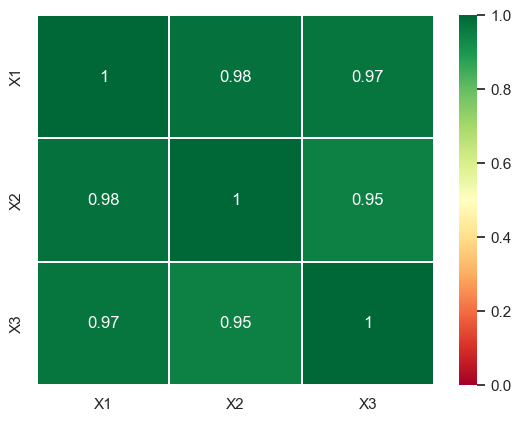

In [8]:
# Read dataframe
data = pd.read_excel('blood.xlsx')
data.dropna(inplace=True)
display(data)

# Dependent variable
explore_column = 'X1' 
 
# Normalization
data = norm_data(data)
display(data)

# Correlation
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.1, vmin=0)

### Гребневая регрессия

,Variable,VIF,Tolerance
0,const,4.671552,0.214062
1,X2,9.525022,0.104987
2,X3,9.525022,0.104987


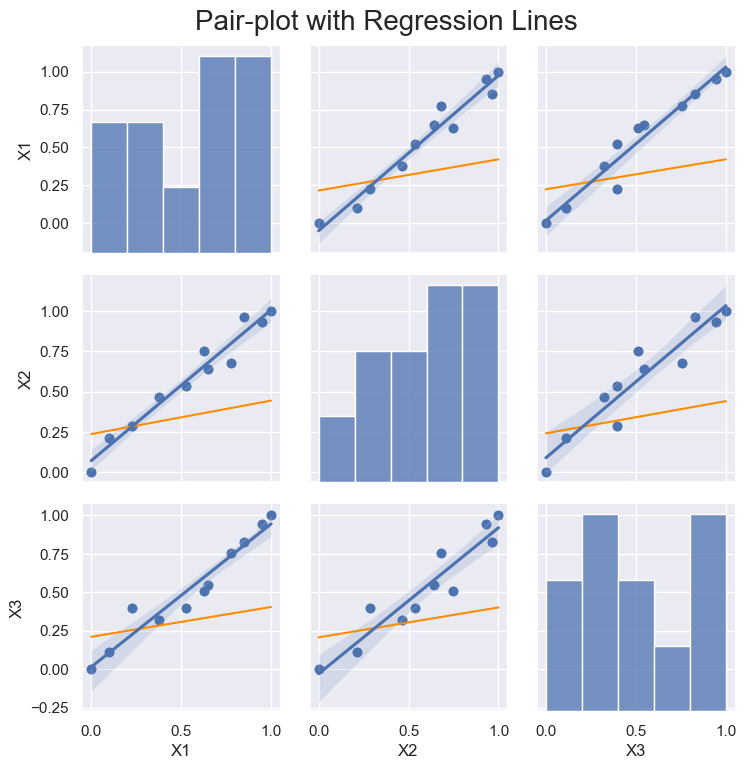

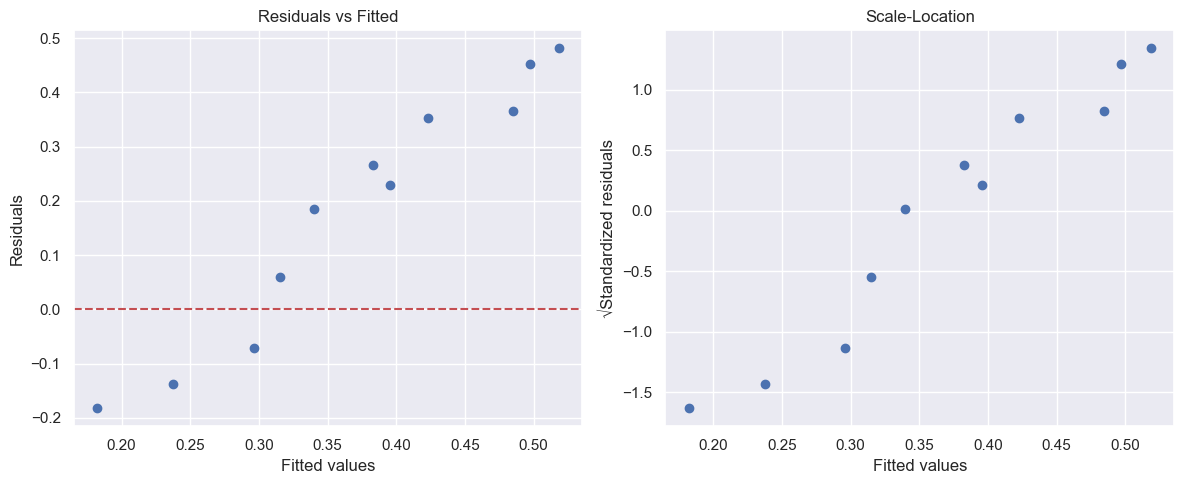

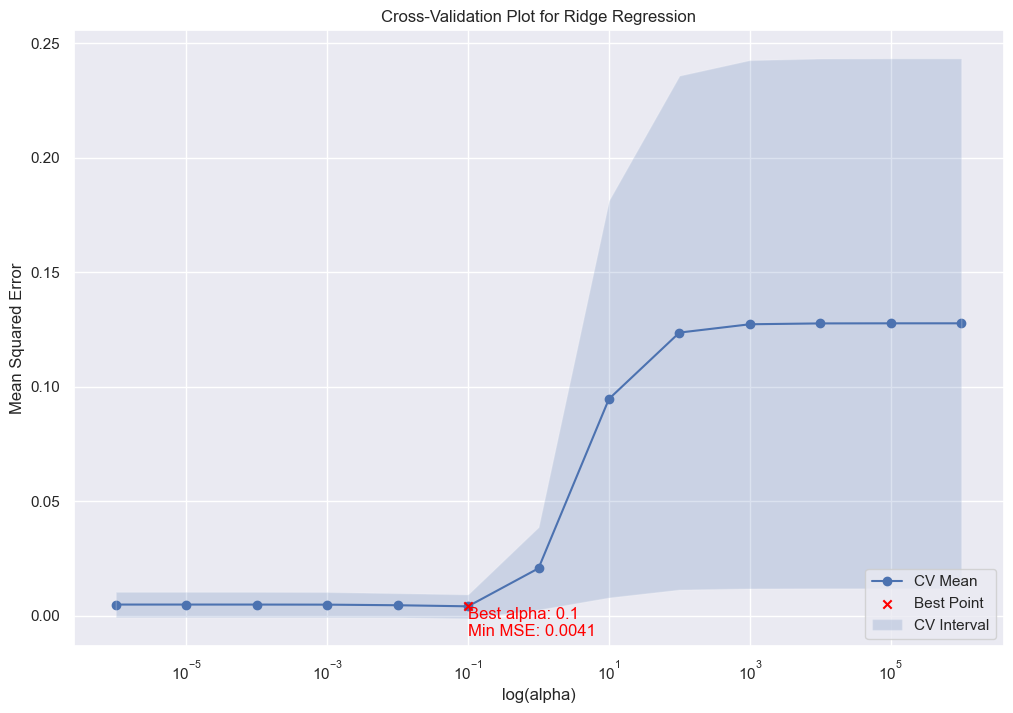

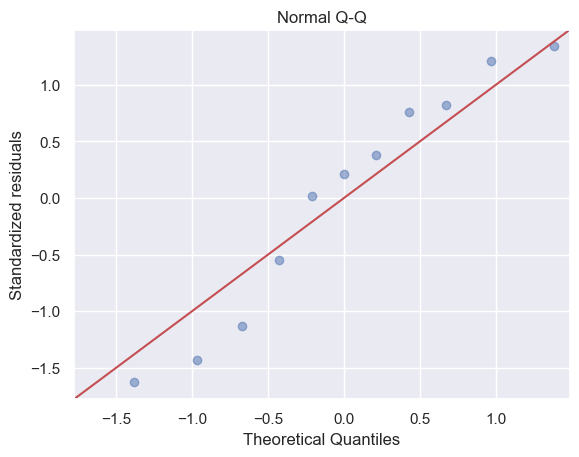

In [9]:
base_research = RidgeRegressionResearch(y=data[explore_column], x=data.drop(columns=explore_column))
base_research.info()
base_research.draw_plots()
# ridge_data = base_research.stepwise_selection(criteria='AIC')

In [10]:
# display(ridge_data)

In [11]:
# Применяем преобразование Бокса-Кокса к зависимой переменной
y_transformed, _ = boxcox(data[explore_column] + 1e-6)  # + 1 чтобы не было 0-значений
ridge_data_t = data.copy()
ridge_data_t[explore_column] = y_transformed
display(ridge_data_t)

,X1,X2,X3
0,-1.417770e+00,0.214286,0.113208
1,-7.887731e-01,0.464286,0.320755
2,-4.224989e-01,0.750000,0.509434
3,-1.565696e-01,0.964286,0.830189
4,-3.906421e-01,0.642857,0.547170
5,9.999997e-07,1.000000,1.000000
6,-1.078086e+00,0.285714,0.396226
7,-5.573369e-01,0.535714,0.396226
8,-2.404627e-01,0.678571,0.754717
9,-2.161995e+00,0.000000,0.000000


,Variable,VIF,Tolerance
0,const,4.671552,0.214062
1,X2,9.525022,0.104987
2,X3,9.525022,0.104987


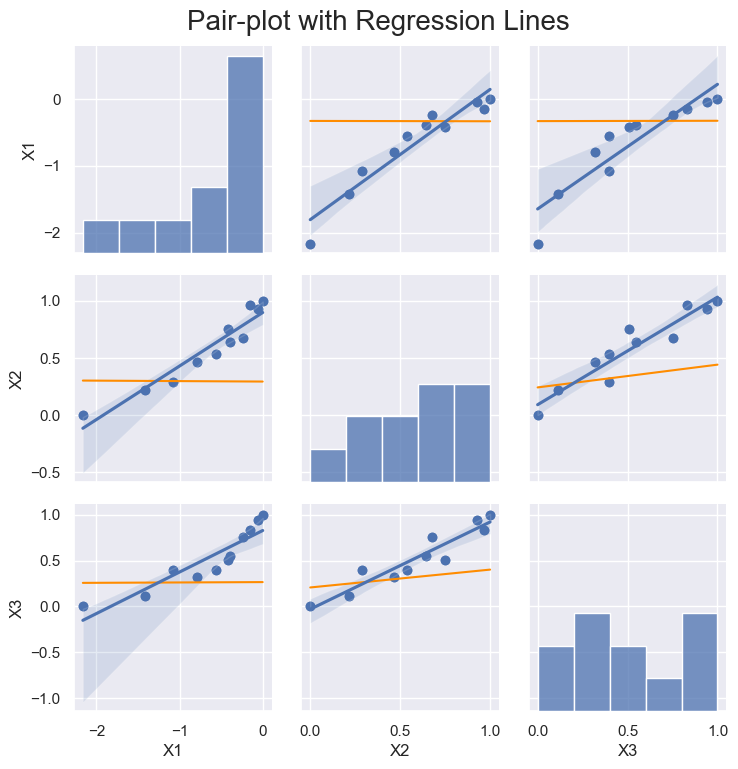

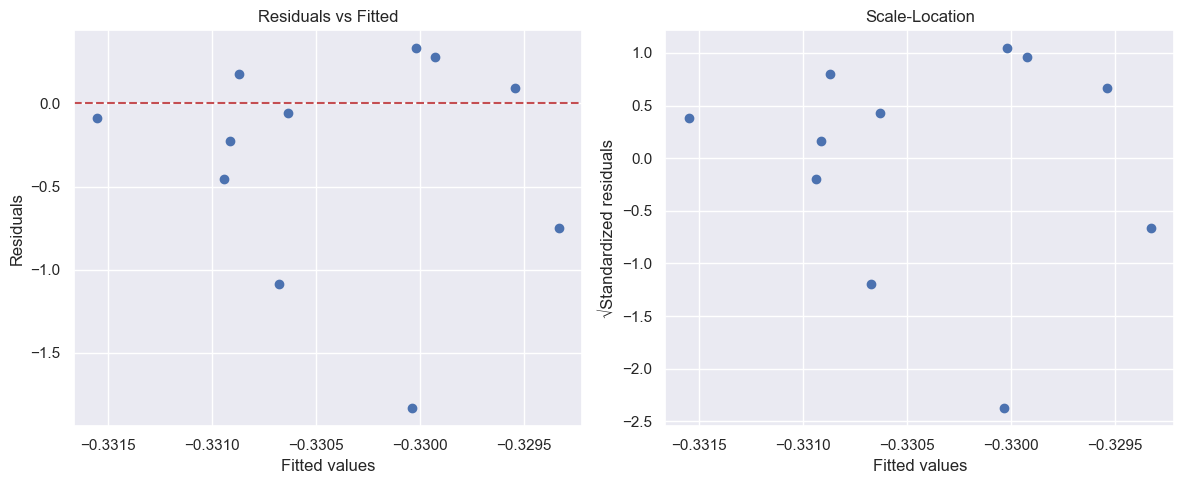

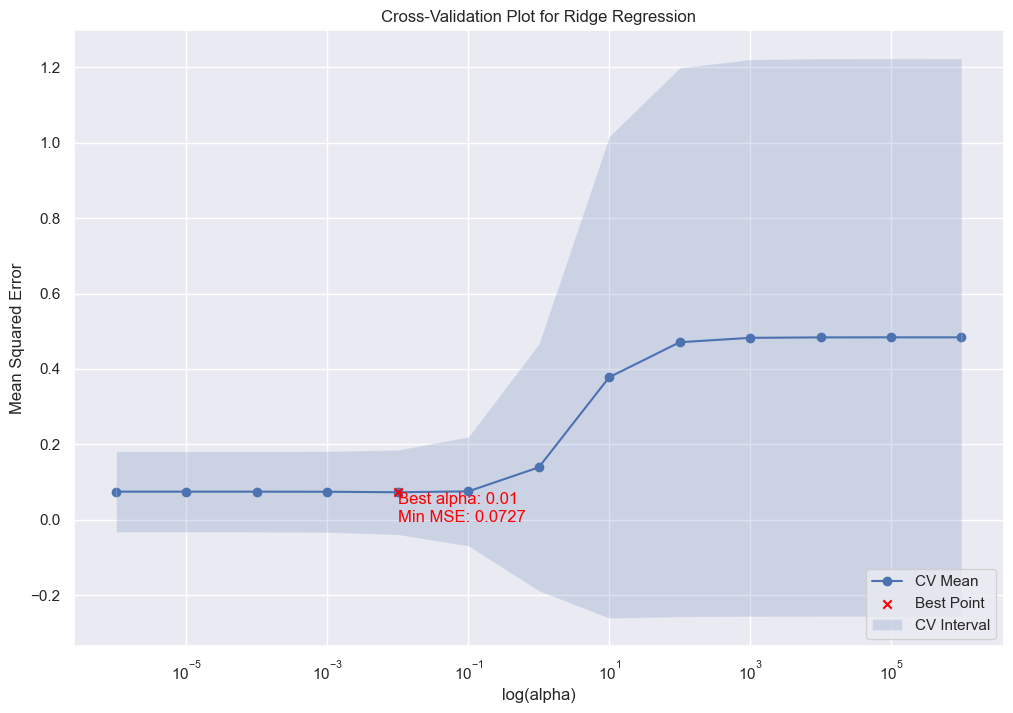

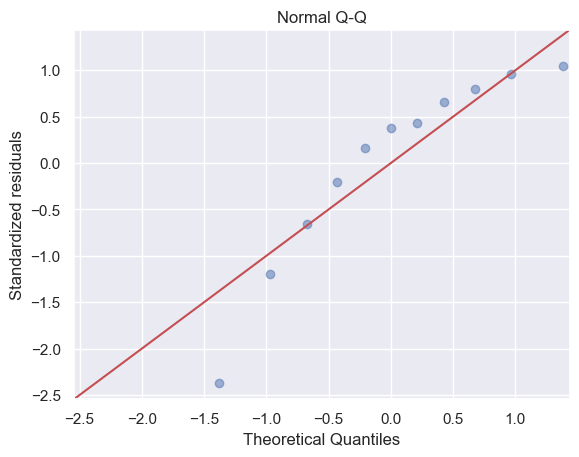

In [12]:
# Проводим анализ заново
enhanced_research = RidgeRegressionResearch(y=ridge_data_t[explore_column], 
                                            x=ridge_data_t.drop(columns=explore_column))
enhanced_research.info()
enhanced_research.draw_plots()

### Линейная регрессия

                                X1
Model:              OLS              Adj. R-squared:     0.971    
Dependent Variable: X1               AIC:                -28.9442 
Date:               2023-12-08 04:15 BIC:                -27.7505 
No. Observations:   11               Log-Likelihood:     17.472   
Df Model:           2                F-statistic:        168.8    
Df Residuals:       8                Prob (F-statistic): 2.87e-07 
R-squared:          0.977            Scale:              0.0033588
--------------------------------------------------------------------
             Coef.    Std.Err.      t      P>|t|     [0.025   0.975]
--------------------------------------------------------------------
const       -0.0365     0.0378   -0.9660   0.3623   -0.1236   0.0506
X2           0.6030     0.1738    3.4702   0.0084    0.2023   1.0037
X3           0.4437     0.1731    2.5627   0.0335    0.0444   0.8429
------------------------------------------------------------------
Omnibus:       

D:\PythonEnv\Matt\lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


,Variable,VIF,Tolerance
0,const,4.671552,0.214062
1,X2,9.525022,0.104987
2,X3,9.525022,0.104987


,const,X2,X3,F-statistic,Prob (F-statistic),df_denom,df_num
0,1.0,0.0,0.0,0.933117,0.36234417473640984,8.0,1.0
1,0.0,1.0,0.0,12.042345,0.008440159086301219,8.0,1.0
2,0.0,0.0,1.0,6.567259,0.033507670692348786,8.0,1.0
3,"[1.0, 0.0, 0.0]","[0.0, 1.0, 0.0]","[0.0, 0.0, 1.0]",445.470148,3.0781996316779783e-09,8.0,3.0


,dfb_const,dfb_X2,dfb_X3,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,-0.422737,-0.052463,0.176840,0.084269,-0.858890,0.255233,-0.502801,-0.843237,-0.493637
1,-0.044153,-0.046045,0.057394,0.003050,-0.205405,0.178214,-0.095654,-0.192648,-0.089713
2,0.030537,-0.239187,0.228904,0.028126,-0.368773,0.382894,-0.290481,-0.347925,-0.274060
3,0.311203,-0.421738,0.254303,0.179757,-1.263604,0.252472,-0.734351,-1.321168,-0.767804
4,0.085455,0.121479,-0.108516,0.040338,1.022046,0.103823,0.347872,1.025316,0.348985
5,0.042693,0.023122,-0.057192,0.006666,-0.211590,0.308762,-0.141414,-0.198480,-0.132652
6,-1.429947,1.656401,-1.438072,0.781478,-1.913693,0.390306,-1.531155,-2.431014,-1.945066
7,0.197380,0.286067,-0.325110,0.084242,1.175714,0.154570,0.502720,1.209198,0.517037
8,0.203845,-0.628953,0.716608,0.234543,1.365835,0.273878,0.838826,1.459009,0.896048
9,0.697729,-0.287827,0.094895,0.169489,0.829946,0.424687,0.713070,0.812091,0.697729


,student_resid,unadj_p,bonferroni(p)
0,-0.843237,0.426967,1.000000
1,-0.192648,0.852705,1.000000
2,-0.347925,0.738124,1.000000
3,-1.321168,0.227992,1.000000
4,1.025316,0.339335,1.000000
5,-0.198480,0.848311,1.000000
6,-2.431014,0.045353,0.498883
7,1.209198,0.265838,1.000000
8,1.459009,0.187929,1.000000
9,0.812091,0.443475,1.000000


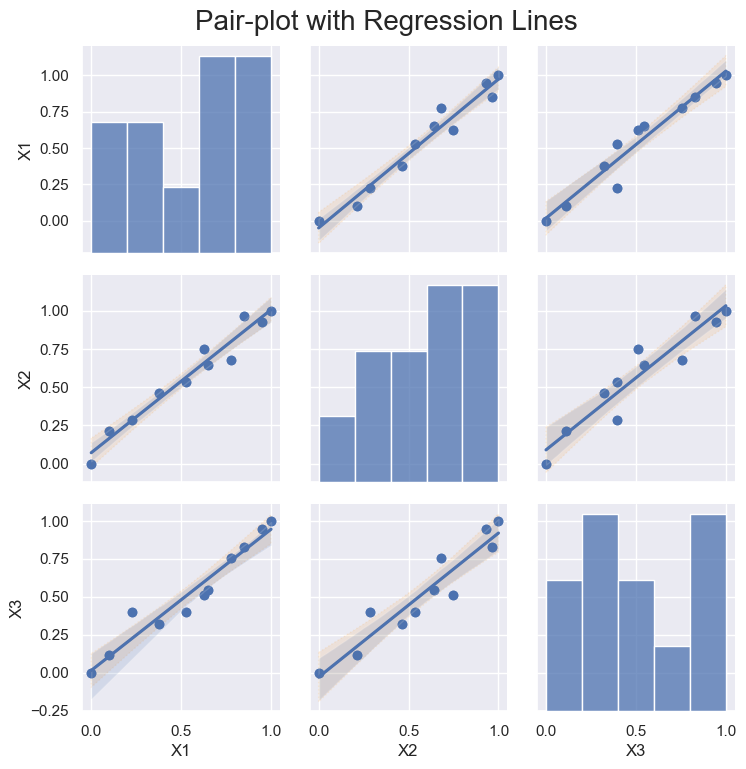

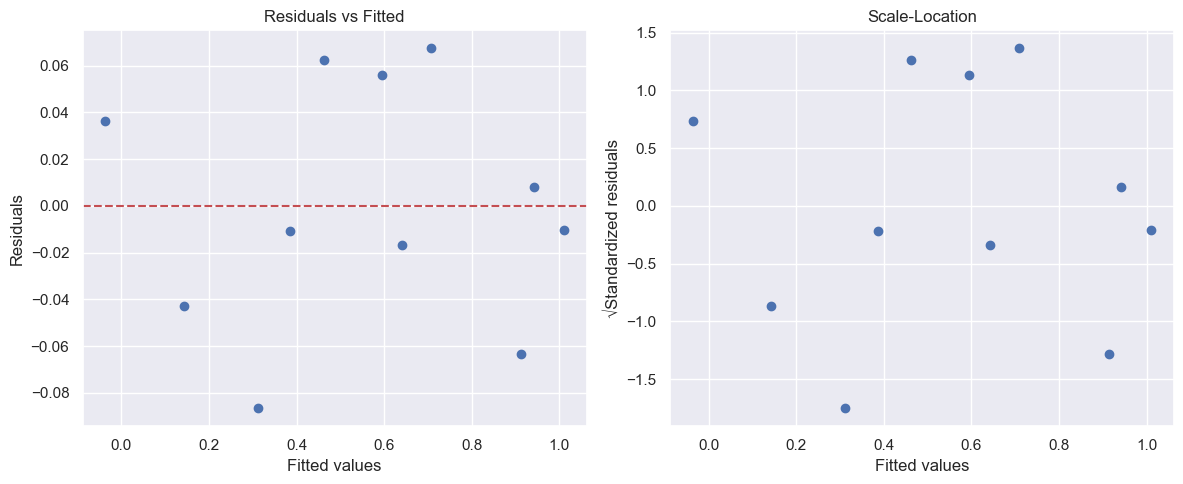

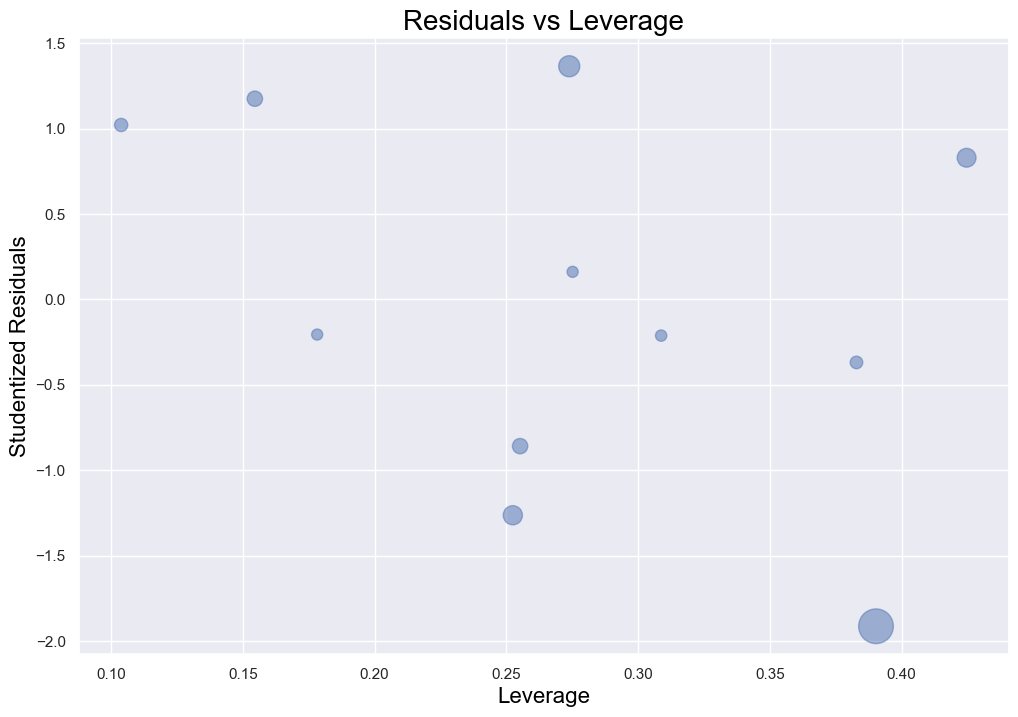

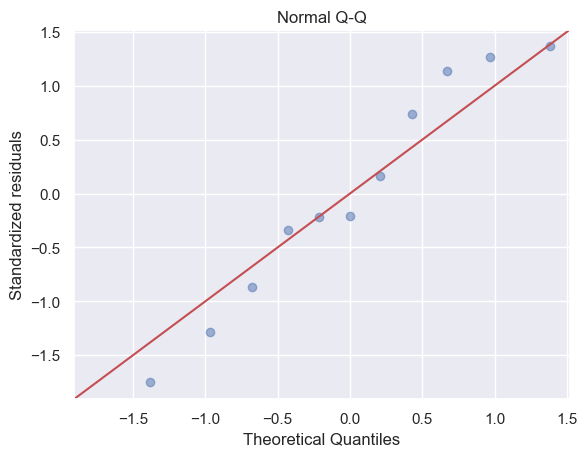

                                STEPS AIC                              
Selected Features: ['X2', 'X3']
AIC: -28.94418317331258


In [13]:
base_research = LinearRegressionResearch(y=data[explore_column], x=data.drop(columns=explore_column))
base_research.info()
base_research.draw_plots()
linear_data = base_research.stepwise_selection(criteria='AIC')

In [14]:
display(linear_data)

,X1,X2,X3
0,0.100,0.214286,0.113208
1,0.375,0.464286,0.320755
2,0.625,0.750000,0.509434
3,0.850,0.964286,0.830189
4,0.650,0.642857,0.547170
5,1.000,1.000000,1.000000
6,0.225,0.285714,0.396226
7,0.525,0.535714,0.396226
8,0.775,0.678571,0.754717
9,0.000,0.000000,0.000000


In [15]:
# Применяем преобразование Бокса-Кокса к зависимой переменной
y_transformed, _ = boxcox(data[explore_column] + 1e-6)  # + 1 чтобы не было 0-значений
linear_data_t = linear_data.copy()
linear_data_t[explore_column] = y_transformed
display(linear_data_t)

,X1,X2,X3
0,-1.417770e+00,0.214286,0.113208
1,-7.887731e-01,0.464286,0.320755
2,-4.224989e-01,0.750000,0.509434
3,-1.565696e-01,0.964286,0.830189
4,-3.906421e-01,0.642857,0.547170
5,9.999997e-07,1.000000,1.000000
6,-1.078086e+00,0.285714,0.396226
7,-5.573369e-01,0.535714,0.396226
8,-2.404627e-01,0.678571,0.754717
9,-2.161995e+00,0.000000,0.000000


                               X1
Model:              OLS              Adj. R-squared:     0.894   
Dependent Variable: X1               AIC:                -0.0488 
Date:               2023-12-08 04:15 BIC:                1.1449  
No. Observations:   11               Log-Likelihood:     3.0244  
Df Model:           2                F-statistic:        43.33   
Df Residuals:       8                Prob (F-statistic): 5.10e-05
R-squared:          0.915            Scale:              0.046453
-------------------------------------------------------------------
          Coef.    Std.Err.      t       P>|t|     [0.025    0.975]
-------------------------------------------------------------------
const    -1.7971     0.1405   -12.7949   0.0000   -2.1210   -1.4732
X2        1.7009     0.6462     2.6322   0.0301    0.2108    3.1911
X3        0.2596     0.6439     0.4031   0.6974   -1.2252    1.7443
-----------------------------------------------------------------
Omnibus:               0.953  

D:\PythonEnv\Matt\lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


,Variable,VIF,Tolerance
0,const,4.671552,0.214062
1,X2,9.525022,0.104987
2,X3,9.525022,0.104987


,const,X2,X3,F-statistic,Prob (F-statistic),df_denom,df_num
0,1.0,0.0,0.0,163.710278,1.3130799566268663e-06,8.0,1.0
1,0.0,1.0,0.0,6.928375,0.0300761875083597,8.0,1.0
2,0.0,0.0,1.0,0.162498,0.6974254557965784,8.0,1.0
3,"[1.0, 0.0, 0.0]","[0.0, 1.0, 0.0]","[0.0, 0.0, 1.0]",63.316716,6.457999633286675e-06,8.0,3.0


,dfb_const,dfb_X2,dfb_X3,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,-0.036594,-0.004541,0.015308,0.000695,-0.078005,0.255233,-0.045665,-0.072995,-0.042732
1,0.153228,0.159792,-0.199178,0.034710,0.692939,0.178214,0.322691,0.668560,0.311338
2,0.016180,-0.126734,0.121285,0.007994,-0.196600,0.382894,-0.154861,-0.184349,-0.145211
3,0.278582,-0.377530,0.227647,0.149994,-1.154265,0.252472,-0.670807,-1.182680,-0.687321
4,0.068419,0.097262,-0.086883,0.027130,0.838178,0.103823,0.285289,0.820917,0.279414
5,0.193748,0.104931,-0.259550,0.123720,-0.911556,0.308762,-0.609230,-0.900743,-0.602004
6,0.442643,-0.512742,0.445158,0.127768,0.773793,0.390306,0.619115,0.752525,0.602099
7,0.190022,0.275403,-0.312991,0.079079,1.139111,0.154570,0.487069,1.164123,0.497764
8,0.160216,-0.494338,0.563232,0.159067,1.124805,0.273878,0.690798,1.146736,0.704267
9,-2.920171,1.204626,-0.397161,1.225737,-2.231913,0.424687,-1.917606,-3.398805,-2.920171


,student_resid,unadj_p,bonferroni(p)
0,-0.072995,0.943852,1.000000
1,0.668560,0.525202,1.000000
2,-0.184349,0.858967,1.000000
3,-1.182680,0.275545,1.000000
4,0.820917,0.438752,1.000000
5,-0.900743,0.397654,1.000000
6,0.752525,0.476274,1.000000
7,1.164123,0.282512,1.000000
8,1.146736,0.289172,1.000000
9,-3.398805,0.011461,0.126072


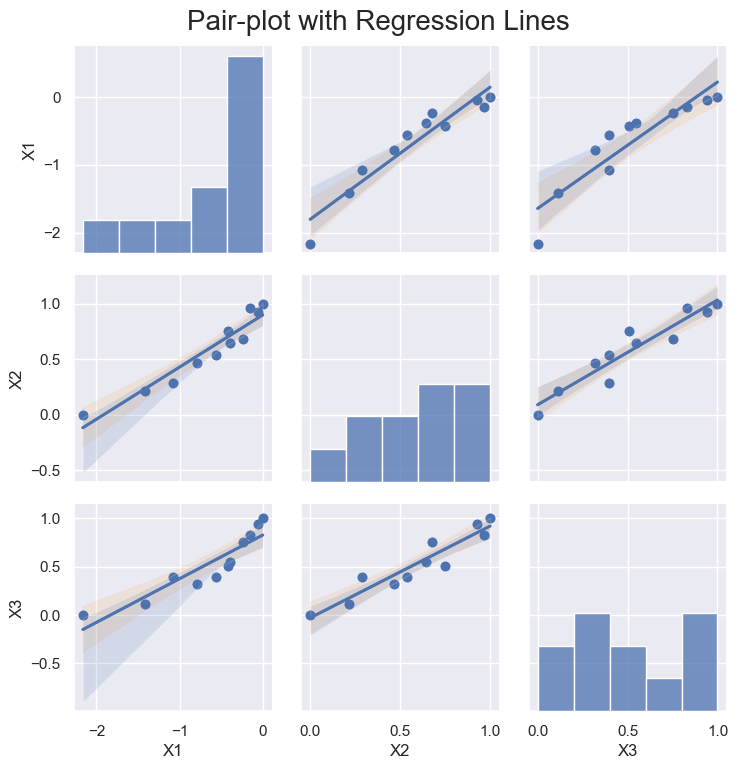

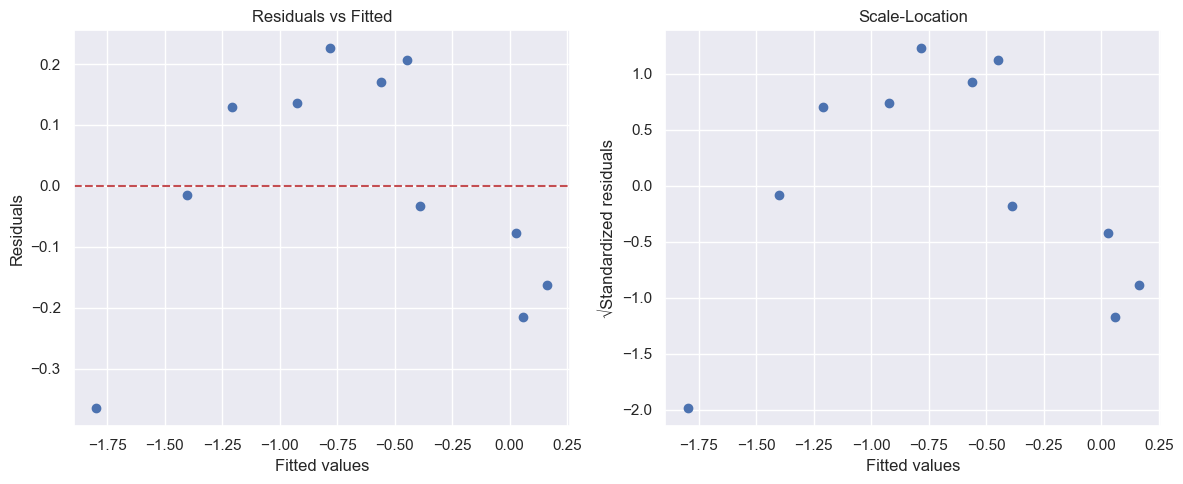

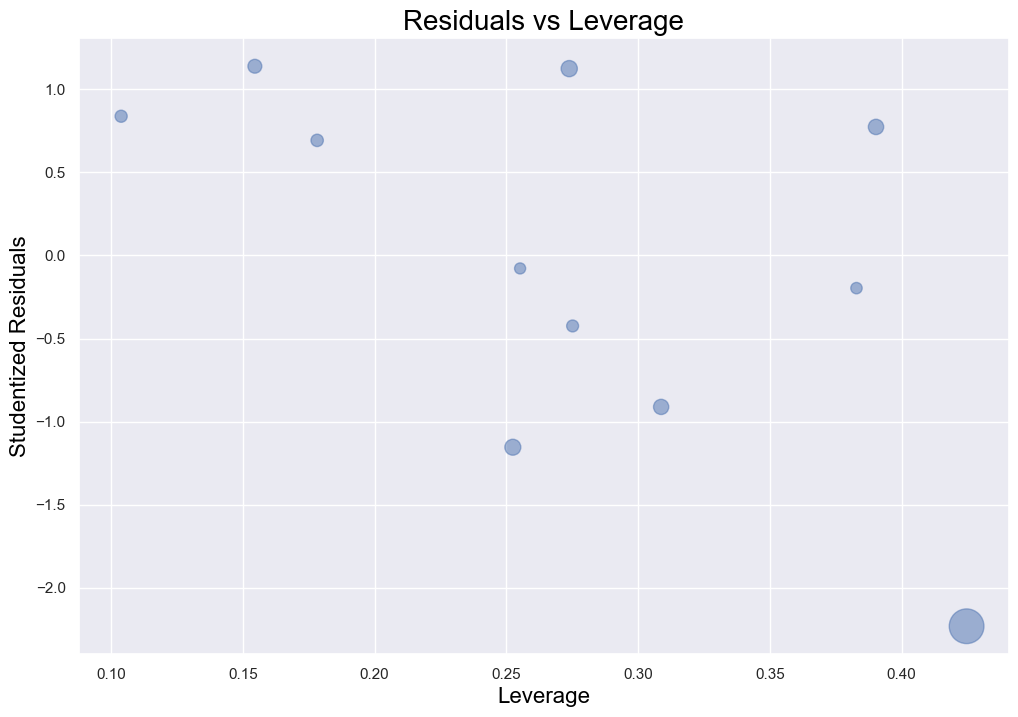

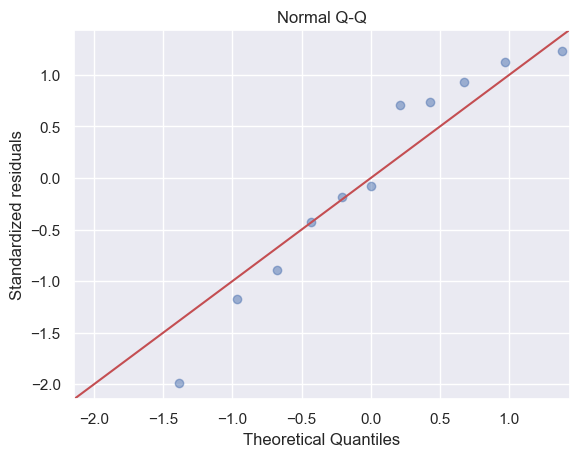

In [16]:
# Проводим анализ заново
enhanced_research = LinearRegressionResearch(y=linear_data_t[explore_column], 
                                             x=linear_data_t.drop(columns=explore_column))
enhanced_research.info()
enhanced_research.draw_plots()